
========== Naive Mean cho nồng độ: 250500 (dữ liệu preprocess) ==========
MAE (Sai số tuyệt đối trung bình): 1.102
RMSE (Căn bậc hai sai số bình phương trung bình): 1.373
R2 (Hệ số xác định): -1.667
MAPE (Phần trăm sai số tuyệt đối trung bình): 229.82%


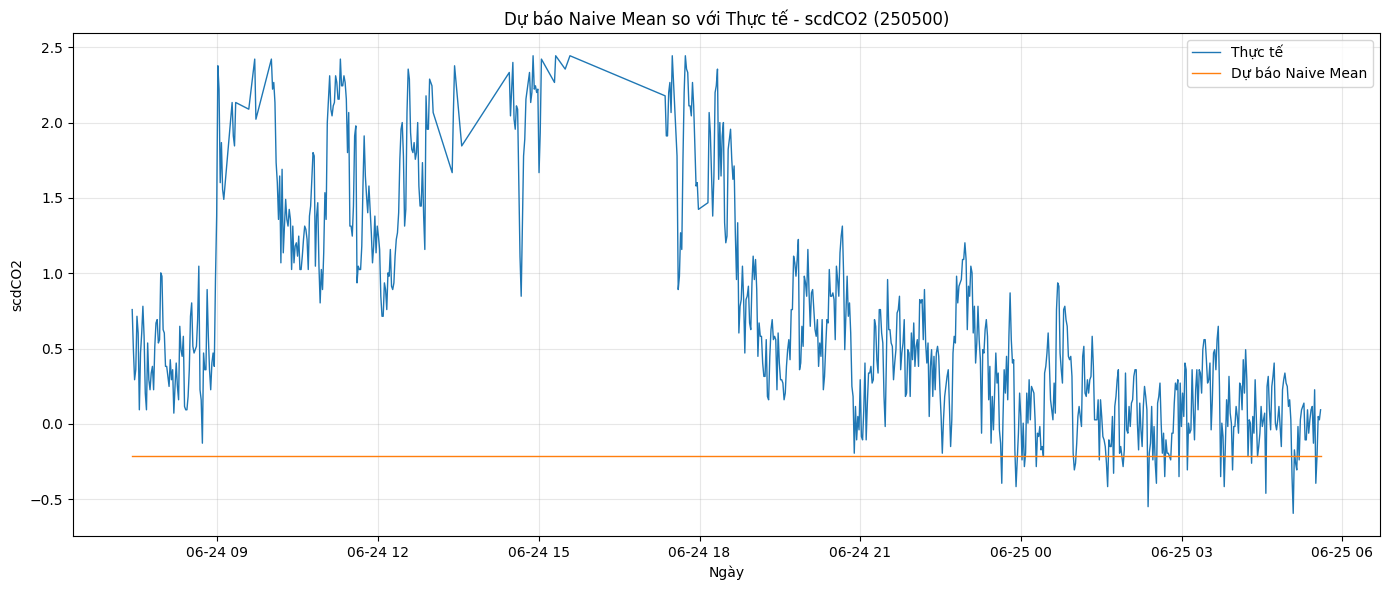


========== Naive Mean cho nồng độ: 500500 (dữ liệu preprocess) ==========
MAE (Sai số tuyệt đối trung bình): 0.912
RMSE (Căn bậc hai sai số bình phương trung bình): 1.115
R2 (Hệ số xác định): -0.042
MAPE (Phần trăm sai số tuyệt đối trung bình): 302.67%


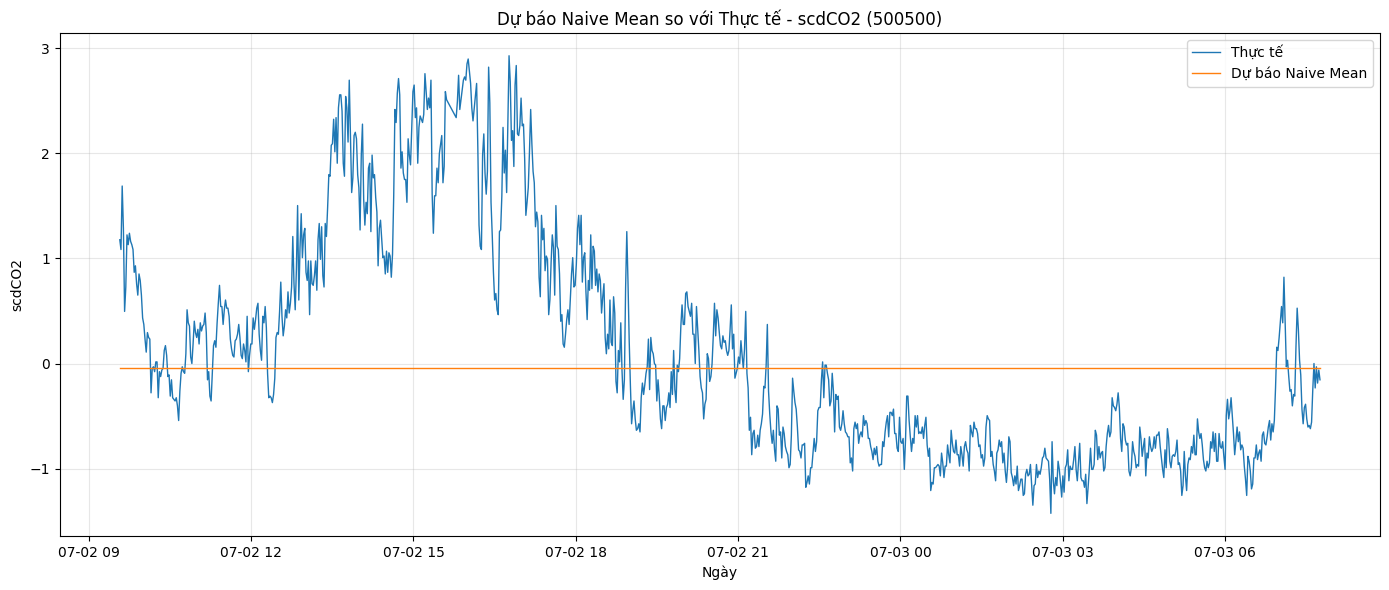


========== Naive Mean cho nồng độ: 750500 (dữ liệu preprocess) ==========
MAE (Sai số tuyệt đối trung bình): 0.832
RMSE (Căn bậc hai sai số bình phương trung bình): 0.972
R2 (Hệ số xác định): -0.186
MAPE (Phần trăm sai số tuyệt đối trung bình): 133.23%


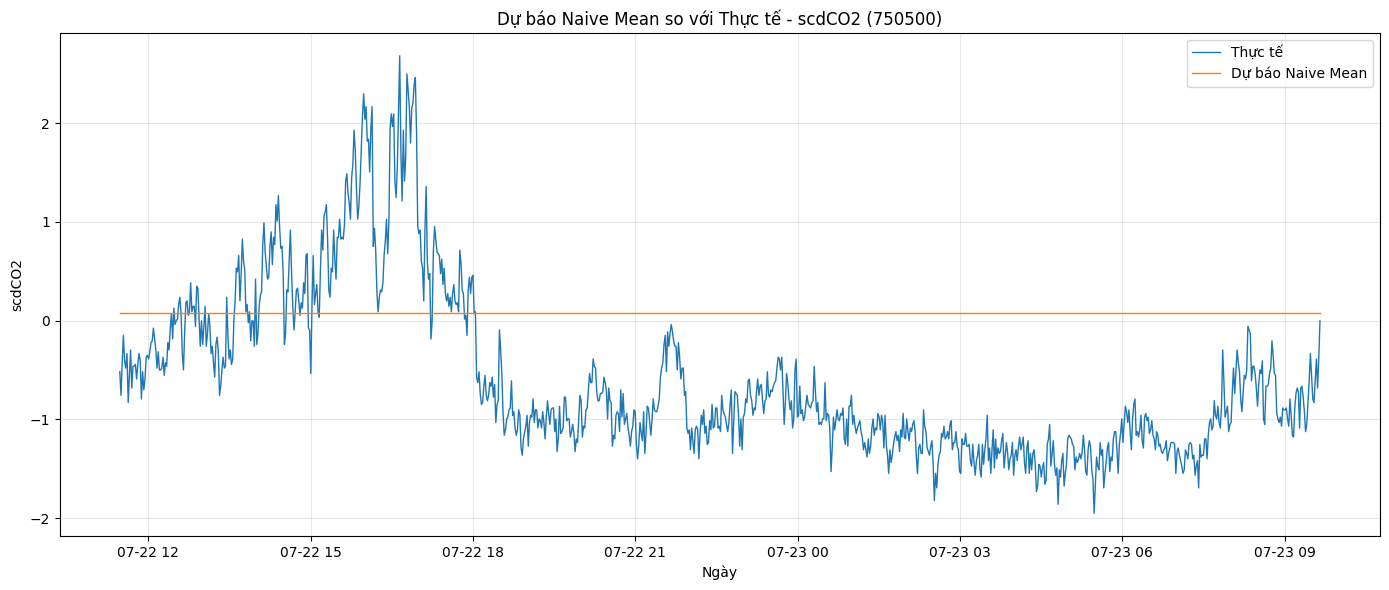


Tổng hợp kết quả các mô hình Naive Mean:
    label       MAE      RMSE        R2        MAPE
0  250500  1.101881  1.373084 -1.666530  229.818130
1  500500  0.911577  1.114875 -0.042266  302.665243
2  750500  0.832169  0.972100 -0.186349  133.229023


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

# Khai báo thư mục và các file dữ liệu
base_dir = r'E:\Khóa luận\Data\Phase 2'
preprocessed_files = {
    '250500': 'preprocessed_250500.csv',
    '500500': 'preprocessed_500500.csv',
    '750500': 'preprocessed_750500.csv'
}

target_col = 'scdCO2'
metrics = []

for label, fname in preprocessed_files.items():
    print(f'\n========== Naive Mean cho nồng độ: {label} (dữ liệu preprocess) ==========')
    file_path = os.path.join(base_dir, fname)
    data = pd.read_csv(file_path, encoding="utf-8")
    data = data.rename(columns=lambda x: x.strip())
    if 'Date time' in data.columns:
        data['Date time'] = pd.to_datetime(data['Date time'])
        data = data.sort_values('Date time')
        data = data.set_index('Date time')

    # Loại bỏ các hàng thiếu giá trị mục tiêu
    data = data.dropna(subset=[target_col])

    # Tách dữ liệu thành tập huấn luyện và kiểm tra (80/20)
    train_size = int(len(data) * 0.8)
    y_train = data[target_col].iloc[:train_size]
    y_test = data[target_col].iloc[train_size:]

    # Dự báo Naive Mean: mọi giá trị dự báo bằng trung bình tập huấn luyện
    mean_value = y_train.mean()
    y_pred = np.full_like(y_test, mean_value, dtype=np.float64)

    # Đánh giá mô hình
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (np.abs(y_test) + 1e-10))) * 100

    print(f"MAE (Sai số tuyệt đối trung bình): {mae:.3f}")
    print(f"RMSE (Căn bậc hai sai số bình phương trung bình): {rmse:.3f}")
    print(f"R2 (Hệ số xác định): {r2:.3f}")
    print(f"MAPE (Phần trăm sai số tuyệt đối trung bình): {mape:.2f}%")

    metrics.append({
        'label': label,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape
    })

    # Vẽ biểu đồ so sánh dự báo và thực tế cho 1000 điểm đầu tiên
    plt.figure(figsize=(14, 6))
    plt.plot(y_test.index[:1000], y_test.values[:1000], label='Thực tế', linewidth=1)
    plt.plot(y_test.index[:1000], y_pred[:1000], label='Dự báo Naive Mean', linewidth=1)
    plt.title(f'Dự báo Naive Mean so với Thực tế - {target_col} ({label})')
    plt.xlabel('Ngày')
    plt.ylabel(target_col)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Tổng hợp kết quả các mô hình Naive Mean
metrics_df = pd.DataFrame(metrics)
print("\nTổng hợp kết quả các mô hình Naive Mean:")
print(metrics_df)